In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
name_dicts={}
with open('match') as f:
    for line in f.readlines():
        line=line.split('\n')[0].split('\t')
        name_dicts[line[1]]=line[0]
print(name_dicts)


{'CD3E': 'CD3', 'CD247': 'CD3', 'CD4': 'CD4', 'CD8A': 'CD8', 'PTPRC': 'CD45RA', 'NCAM1': 'CD56', 'FCGR3A': 'CD16', 'ITGAX': 'CD11c', 'CD14': 'CD14', 'CD19': 'CD19', 'CD34': 'CD34'}


In [3]:
value_dicts={}
with open('prior') as f:
    for line in f.readlines():
        line=line.split('\n')[0].split('\t')
        value_dicts[(name_dicts[line[0]],name_dicts[line[1]])]=float(line[2])
print(len(value_dicts))
print(value_dicts)

35
{('CD3', 'CD4'): 0.58375, ('CD3', 'CD34'): 0.243, ('CD8', 'CD3'): 0.569, ('CD8', 'CD16'): 0.29775, ('CD8', 'CD14'): 0.1945, ('CD45RA', 'CD4'): 0.725, ('CD45RA', 'CD3'): 0.6745, ('CD45RA', 'CD34'): 0.4625, ('CD45RA', 'CD8'): 0.4275, ('CD45RA', 'CD16'): 0.35875, ('CD45RA', 'CD14'): 0.29625, ('CD56', 'CD19'): 0.4605, ('CD56', 'CD45RA'): 0.42575, ('CD56', 'CD34'): 0.3995, ('CD56', 'CD11c'): 0.3535, ('CD56', 'CD16'): 0.269, ('CD56', 'CD14'): 0.233, ('CD56', 'CD3'): 0.215, ('CD16', 'CD3'): 0.185, ('CD16', 'CD4'): 0.40425, ('CD16', 'CD14'): 0.20575, ('CD11c', 'CD45RA'): 0.47725, ('CD11c', 'CD19'): 0.449, ('CD11c', 'CD3'): 0.383, ('CD11c', 'CD34'): 0.362, ('CD11c', 'CD4'): 0.28975, ('CD11c', 'CD14'): 0.2785, ('CD11c', 'CD8'): 0.26475, ('CD11c', 'CD16'): 0.1955, ('CD19', 'CD45RA'): 0.46275, ('CD19', 'CD34'): 0.436, ('CD19', 'CD3'): 0.3735, ('CD19', 'CD14'): 0.274, ('CD19', 'CD16'): 0.255, ('CD34', 'CD14'): 0.2725}


In [4]:
combine_value_dicts={}
with open('combine_score') as f:
    for line in f.readlines():
        line=line.split('\n')[0].split('\t')
        combine_value_dicts[(name_dicts[line[0]],name_dicts[line[1]])]=float(line[2])
print(len(combine_value_dicts))
print(combine_value_dicts)

database_value_dicts={}
with open('database') as f:
    for line in f.readlines():
        line=line.split('\n')[0].split('\t')
        database_value_dicts[(name_dicts[line[0]],name_dicts[line[1]])]=float(line[2])
print(len(database_value_dicts))
print(database_value_dicts)

experiment_value_dicts={}
with open('experiment') as f:
    for line in f.readlines():
        line=line.split('\n')[0].split('\t')
        experiment_value_dicts[(name_dicts[line[0]],name_dicts[line[1]])]=float(line[2])
print(len(experiment_value_dicts))
print(experiment_value_dicts)

text_value_dicts={}
with open('text_mining') as f:
    for line in f.readlines():
        line=line.split('\n')[0].split('\t')
        text_value_dicts[(name_dicts[line[0]],name_dicts[line[1]])]=float(line[2])
print(len(text_value_dicts))
print(text_value_dicts)

35
{('CD3', 'CD4'): 0.955, ('CD3', 'CD34'): 0.486, ('CD8', 'CD3'): 0.959, ('CD8', 'CD16'): 0.621, ('CD8', 'CD14'): 0.414, ('CD45RA', 'CD4'): 0.982, ('CD45RA', 'CD3'): 0.982, ('CD45RA', 'CD34'): 0.925, ('CD45RA', 'CD8'): 0.763, ('CD45RA', 'CD16'): 0.695, ('CD45RA', 'CD14'): 0.619, ('CD56', 'CD19'): 0.922, ('CD56', 'CD45RA'): 0.816, ('CD56', 'CD34'): 0.799, ('CD56', 'CD11c'): 0.708, ('CD56', 'CD16'): 0.538, ('CD56', 'CD14'): 0.466, ('CD56', 'CD3'): 0.43, ('CD16', 'CD3'): 0.411, ('CD16', 'CD4'): 0.758, ('CD16', 'CD14'): 0.633, ('CD11c', 'CD45RA'): 0.929, ('CD11c', 'CD19'): 0.901, ('CD11c', 'CD3'): 0.772, ('CD11c', 'CD34'): 0.724, ('CD11c', 'CD4'): 0.605, ('CD11c', 'CD14'): 0.596, ('CD11c', 'CD8'): 0.544, ('CD11c', 'CD16'): 0.491, ('CD19', 'CD45RA'): 0.931, ('CD19', 'CD34'): 0.872, ('CD19', 'CD3'): 0.762, ('CD19', 'CD14'): 0.548, ('CD19', 'CD16'): 0.521, ('CD34', 'CD14'): 0.545}
35
{('CD3', 'CD4'): 0.9, ('CD3', 'CD34'): 0.0, ('CD8', 'CD3'): 0.9, ('CD8', 'CD16'): 0.0, ('CD8', 'CD14'): 0.0, 

In [5]:
cbmc_pd=pd.read_csv('../raw_data/CITE/GSE100866_CBMC_8K_13AB_10X-ADT_clr-transformed.csv')
cbmc_protein=list(cbmc_pd['Unnamed: 0'])
print(cbmc_protein)

['CD3', 'CD4', 'CD8', 'CD45RA', 'CD56', 'CD16', 'CD10', 'CD11c', 'CD14', 'CD19', 'CD34', 'CCR5', 'CCR7']


In [6]:
pbmc_pd=pd.read_csv('../raw_data/CITE/GSE100866_PBMC_vs_flow_10X-ADT_clr-transformed.csv')
pbmc_protein=list(pbmc_pd['Unnamed: 0'])
print(pbmc_protein)

['CD3', 'CD4', 'CD8', 'CD2', 'CD45RA', 'CD57', 'CD16', 'CD14', 'CD11c', 'CD19']


In [8]:
cbmc_matrix=np.zeros((len(cbmc_protein),len(cbmc_protein)))
for idx_i,p_i in enumerate(cbmc_protein):
    for idx_j,p_j in enumerate(pbmc_protein):
        if (p_i,p_j) in value_dicts:
            cbmc_matrix[idx_i][idx_j]=value_dicts[(p_i,p_j)]
        if (p_j,p_i) in value_dicts:
            cbmc_matrix[idx_i][idx_j]=value_dicts[(p_j,p_i)]
print(cbmc_matrix)
np.save('cbmc.npy',cbmc_matrix)

[[0.      0.58375 0.569   0.      0.6745  0.      0.185   0.      0.383
  0.3735  0.      0.      0.     ]
 [0.58375 0.      0.      0.      0.725   0.      0.40425 0.      0.28975
  0.      0.      0.      0.     ]
 [0.569   0.      0.      0.      0.4275  0.      0.29775 0.1945  0.26475
  0.      0.      0.      0.     ]
 [0.6745  0.725   0.4275  0.      0.      0.      0.35875 0.29625 0.47725
  0.46275 0.      0.      0.     ]
 [0.215   0.      0.      0.      0.42575 0.      0.269   0.233   0.3535
  0.4605  0.      0.      0.     ]
 [0.185   0.40425 0.29775 0.      0.35875 0.      0.      0.20575 0.1955
  0.255   0.      0.      0.     ]
 [0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.     ]
 [0.383   0.28975 0.26475 0.      0.47725 0.      0.1955  0.2785  0.
  0.449   0.      0.      0.     ]
 [0.      0.      0.1945  0.      0.29625 0.      0.20575 0.      0.2785
  0.274   0.      0.      0.     ]
 [0.3735  0.      0.      0.      

In [33]:
combine_cbmc_matrix=np.zeros((len(cbmc_protein),len(cbmc_protein)))
for idx_i,p_i in enumerate(cbmc_protein):
    for idx_j,p_j in enumerate(pbmc_protein):
        if (p_i,p_j) in value_dicts:
            combine_cbmc_matrix[idx_i][idx_j]=combine_value_dicts[(p_i,p_j)]
            combine_cbmc_matrix[idx_j][idx_i]=combine_value_dicts[(p_i,p_j)]
        if (p_j,p_i) in value_dicts:
            combine_cbmc_matrix[idx_i][idx_j]=combine_value_dicts[(p_j,p_i)]
            combine_cbmc_matrix[idx_j][idx_i]=combine_value_dicts[(p_j,p_i)]
print(combine_cbmc_matrix)
np.save('combine_cbmc.npy',combine_cbmc_matrix)

database_cbmc_matrix=np.zeros((len(cbmc_protein),len(cbmc_protein)))
for idx_i,p_i in enumerate(cbmc_protein):
    for idx_j,p_j in enumerate(pbmc_protein):
        if (p_i,p_j) in value_dicts:
            database_cbmc_matrix[idx_i][idx_j]=database_value_dicts[(p_i,p_j)]
            database_cbmc_matrix[idx_j][idx_i]=database_value_dicts[(p_i,p_j)]
        if (p_j,p_i) in value_dicts:
            database_cbmc_matrix[idx_i][idx_j]=database_value_dicts[(p_j,p_i)]
            database_cbmc_matrix[idx_j][idx_i]=database_value_dicts[(p_j,p_i)]
print(database_cbmc_matrix)
np.save('database_cbmc.npy',database_cbmc_matrix)

experiment_cbmc_matrix=np.zeros((len(cbmc_protein),len(cbmc_protein)))
for idx_i,p_i in enumerate(cbmc_protein):
    for idx_j,p_j in enumerate(pbmc_protein):
        if (p_i,p_j) in value_dicts:
            experiment_cbmc_matrix[idx_i][idx_j]=experiment_value_dicts[(p_i,p_j)]
            experiment_cbmc_matrix[idx_j][idx_i]=experiment_value_dicts[(p_i,p_j)]
        if (p_j,p_i) in value_dicts:
            experiment_cbmc_matrix[idx_i][idx_j]=experiment_value_dicts[(p_j,p_i)]
            experiment_cbmc_matrix[idx_j][idx_i]=experiment_value_dicts[(p_j,p_i)]
print(experiment_cbmc_matrix)
np.save('experiment_cbmc.npy',experiment_cbmc_matrix)

text_cbmc_matrix=np.zeros((len(cbmc_protein),len(cbmc_protein)))
for idx_i,p_i in enumerate(cbmc_protein):
    for idx_j,p_j in enumerate(pbmc_protein):
        if (p_i,p_j) in value_dicts:
            text_cbmc_matrix[idx_i][idx_j]=text_value_dicts[(p_i,p_j)]
            text_cbmc_matrix[idx_j][idx_i]=text_value_dicts[(p_i,p_j)]
        if (p_j,p_i) in value_dicts:
            text_cbmc_matrix[idx_i][idx_j]=text_value_dicts[(p_j,p_i)]
            text_cbmc_matrix[idx_j][idx_i]=text_value_dicts[(p_j,p_i)]
print(text_cbmc_matrix)
np.save('text_cbmc.npy',text_cbmc_matrix)

[[0.    0.955 0.959 0.982 0.43  0.411 0.411 0.772 0.772 0.762 0.486 0.
  0.   ]
 [0.955 0.    0.    0.982 0.982 0.758 0.758 0.605 0.605 0.    0.    0.
  0.   ]
 [0.959 0.    0.    0.763 0.763 0.621 0.621 0.544 0.414 0.    0.    0.
  0.   ]
 [0.982 0.982 0.763 0.    0.    0.    0.695 0.619 0.929 0.931 0.    0.
  0.   ]
 [0.43  0.982 0.763 0.    0.816 0.695 0.538 0.929 0.619 0.931 0.925 0.
  0.   ]
 [0.411 0.758 0.621 0.    0.695 0.    0.    0.633 0.491 0.521 0.    0.
  0.   ]
 [0.411 0.758 0.621 0.695 0.538 0.    0.    0.491 0.633 0.521 0.    0.
  0.   ]
 [0.772 0.605 0.544 0.619 0.929 0.633 0.491 0.596 0.    0.548 0.545 0.
  0.   ]
 [0.772 0.605 0.414 0.929 0.619 0.491 0.633 0.    0.596 0.901 0.724 0.
  0.   ]
 [0.762 0.    0.    0.931 0.931 0.521 0.521 0.548 0.901 0.    0.872 0.
  0.   ]
 [0.486 0.    0.    0.    0.925 0.    0.    0.545 0.724 0.872 0.    0.
  0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.   ]
 [0.    0.    0.    0.    0.    0.    0.

In [9]:
pbmc_matrix=np.zeros((len(pbmc_protein),len(pbmc_protein)))
for idx_i,p_i in enumerate(pbmc_protein):
    for idx_j,p_j in enumerate(pbmc_protein):
        if (p_i,p_j) in value_dicts:
            pbmc_matrix[idx_i][idx_j]=value_dicts[(p_i,p_j)]
        if (p_j,p_i) in value_dicts:
            pbmc_matrix[idx_i][idx_j]=value_dicts[(p_j,p_i)]
np.save('pbmc.npy',pbmc_matrix)
print(pbmc_matrix)

[[0.      0.58375 0.569   0.      0.6745  0.      0.185   0.      0.383
  0.3735 ]
 [0.58375 0.      0.      0.      0.725   0.      0.40425 0.      0.28975
  0.     ]
 [0.569   0.      0.      0.      0.4275  0.      0.29775 0.1945  0.26475
  0.     ]
 [0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.     ]
 [0.6745  0.725   0.4275  0.      0.      0.      0.35875 0.29625 0.47725
  0.46275]
 [0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.     ]
 [0.185   0.40425 0.29775 0.      0.35875 0.      0.      0.20575 0.1955
  0.255  ]
 [0.      0.      0.1945  0.      0.29625 0.      0.20575 0.      0.2785
  0.274  ]
 [0.383   0.28975 0.26475 0.      0.47725 0.      0.1955  0.2785  0.
  0.449  ]
 [0.3735  0.      0.      0.      0.46275 0.      0.255   0.274   0.449
  0.     ]]


In [34]:
combine_pbmc_matrix=np.zeros((len(pbmc_protein),len(pbmc_protein)))
for idx_i,p_i in enumerate(pbmc_protein):
    for idx_j,p_j in enumerate(pbmc_protein):
        if (p_i,p_j) in value_dicts:
            combine_pbmc_matrix[idx_i][idx_j]=combine_value_dicts[(p_i,p_j)]
            combine_pbmc_matrix[idx_j][idx_i]=combine_value_dicts[(p_i,p_j)]
        if (p_j,p_i) in value_dicts:
            combine_pbmc_matrix[idx_i][idx_j]=combine_value_dicts[(p_j,p_i)]
            combine_pbmc_matrix[idx_j][idx_i]=combine_value_dicts[(p_j,p_i)]
np.save('combine_pbmc.npy',combine_pbmc_matrix)
print(combine_pbmc_matrix)

database_pbmc_matrix=np.zeros((len(pbmc_protein),len(pbmc_protein)))
for idx_i,p_i in enumerate(pbmc_protein):
    for idx_j,p_j in enumerate(pbmc_protein):
        if (p_i,p_j) in value_dicts:
            database_pbmc_matrix[idx_i][idx_j]=database_value_dicts[(p_i,p_j)]
            database_pbmc_matrix[idx_j][idx_i]=database_value_dicts[(p_i,p_j)]
        if (p_j,p_i) in value_dicts:
            database_pbmc_matrix[idx_i][idx_j]=database_value_dicts[(p_j,p_i)]
            database_pbmc_matrix[idx_j][idx_i]=database_value_dicts[(p_j,p_i)]
np.save('database_pbmc.npy',database_pbmc_matrix)
print(database_pbmc_matrix)

experiment_pbmc_matrix=np.zeros((len(pbmc_protein),len(pbmc_protein)))
for idx_i,p_i in enumerate(pbmc_protein):
    for idx_j,p_j in enumerate(pbmc_protein):
        if (p_i,p_j) in value_dicts:
            experiment_pbmc_matrix[idx_i][idx_j]=experiment_value_dicts[(p_i,p_j)]
            experiment_pbmc_matrix[idx_j][idx_i]=experiment_value_dicts[(p_i,p_j)]
        if (p_j,p_i) in value_dicts:
            experiment_pbmc_matrix[idx_i][idx_j]=experiment_value_dicts[(p_j,p_i)]
            experiment_pbmc_matrix[idx_j][idx_i]=experiment_value_dicts[(p_j,p_i)]
np.save('experiment_pbmc.npy',experiment_pbmc_matrix)
print(experiment_pbmc_matrix)

text_pbmc_matrix=np.zeros((len(pbmc_protein),len(pbmc_protein)))
for idx_i,p_i in enumerate(pbmc_protein):
    for idx_j,p_j in enumerate(pbmc_protein):
        if (p_i,p_j) in value_dicts:
            text_pbmc_matrix[idx_i][idx_j]=text_value_dicts[(p_i,p_j)]
            text_pbmc_matrix[idx_j][idx_i]=text_value_dicts[(p_i,p_j)]
        if (p_j,p_i) in value_dicts:
            text_pbmc_matrix[idx_i][idx_j]=text_value_dicts[(p_j,p_i)]
            text_pbmc_matrix[idx_j][idx_i]=text_value_dicts[(p_j,p_i)]
np.save('text_pbmc.npy',text_pbmc_matrix)
print(text_pbmc_matrix)


[[0.    0.955 0.959 0.    0.982 0.    0.411 0.    0.772 0.762]
 [0.955 0.    0.    0.    0.982 0.    0.758 0.    0.605 0.   ]
 [0.959 0.    0.    0.    0.763 0.    0.621 0.414 0.544 0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.982 0.982 0.763 0.    0.    0.    0.695 0.619 0.929 0.931]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.411 0.758 0.621 0.    0.695 0.    0.    0.633 0.491 0.521]
 [0.    0.    0.414 0.    0.619 0.    0.633 0.    0.596 0.548]
 [0.772 0.605 0.544 0.    0.929 0.    0.491 0.596 0.    0.901]
 [0.762 0.    0.    0.    0.931 0.    0.521 0.548 0.901 0.   ]]
[[0.  0.9 0.9 0.  0.9 0.  0.  0.  0.  0. ]
 [0.9 0.  0.  0.  0.9 0.  0.  0.  0.  0. ]
 [0.9 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.9 0.9 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0. 

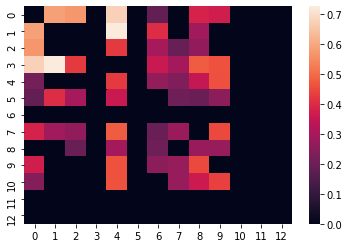

In [10]:
sns.heatmap(np.abs(cbmc_matrix))

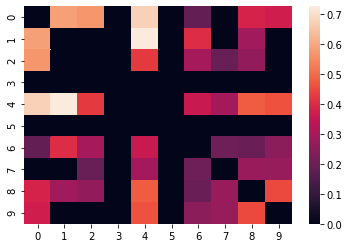

In [11]:

sns.heatmap(np.abs(pbmc_matrix))

In [13]:
x_tick=cbmc_protein
y_tick=cbmc_protein
X=abs(cbmc_matrix)/4
data={}
for i in range(len(cbmc_protein)):
    data[x_tick[i]] = X[i]
pd_data=pd.DataFrame(data,index=y_tick,columns=x_tick)
print(pd_data)

             CD3       CD4       CD8    CD45RA      CD56      CD16  CD10  \
CD3     0.000000  0.145937  0.142250  0.168625  0.053750  0.046250   0.0   
CD4     0.145937  0.000000  0.000000  0.181250  0.000000  0.101062   0.0   
CD8     0.142250  0.000000  0.000000  0.106875  0.000000  0.074438   0.0   
CD45RA  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   0.0   
CD56    0.168625  0.181250  0.106875  0.000000  0.106438  0.089688   0.0   
CD16    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   0.0   
CD10    0.046250  0.101062  0.074438  0.089688  0.067250  0.000000   0.0   
CD11c   0.000000  0.000000  0.048625  0.074063  0.058250  0.051437   0.0   
CD14    0.095750  0.072438  0.066187  0.119313  0.088375  0.048875   0.0   
CD19    0.093375  0.000000  0.000000  0.115687  0.115125  0.063750   0.0   
CD34    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   0.0   
CCR5    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   0.0   
CCR7    0.00

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


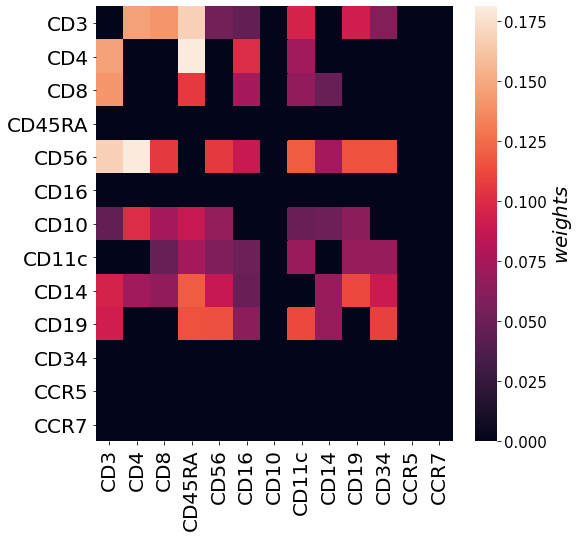

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import mpl
 
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'NSimSun,Times New Roman'
font = {'family': 'sans-serif',
            'color': 'k',
            'weight': 'normal',
            'size': 20,}
 
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(pd_data) #画heatmap，具体参数可以查文档
 
plt.xticks(fontsize=20) #x轴刻度的字体大小（文本包含在pd_data中了）
plt.yticks(fontsize=20) #y轴刻度的字体大小（文本包含在pd_data中了）
#设置colorbar的刻度字体大小
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=15)
#设置colorbar的label文本和字体大小
cbar = ax.collections[0].colorbar
cbar.set_label(r'$weights$',fontdict=font)